Olympics 2016
-------------
This notebook should track the progress of the 2016 Olympics using Wikipedea as a source of information.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import datetime

Get the data!
---

In [2]:
r = requests.get("https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table")
last_update = datetime.datetime.now()
last_update = last_update.strftime('%H:%M %a %d %b %Y')
print last_update, "Result:", r.status_code

07:44 Fri 12 Aug 2016 Result: 200


Parse the data
----

In [5]:
soup = BeautifulSoup(r.text, 'html.parser')
t = soup.find_all('table')
Medals = []
# Note that this depends on the current page layout - at the moment the table we are after is second
for row in t[1].findAll('tr')[1:-1]: # Skip first (header) & last (totals) rows
    vals = row.text.split('\n')  # Split the text value on line breaks 
    if len(vals) > 6:
        try:
            start = 1  # Most lines start on line 2
            if len(vals) == 8: # Some on line 3
                start = 2
            country, gold, silver, bronze, total = vals[start:-1] # Also skip the spare at the end
            country, code = country.split(u'\xa0')[1:]  # For some reason the countries are u'\xa0Name\xa0(code)'
            Medals.append([country, code[1:-1],  # Country and code without brackets
                           int(gold), int(silver), int(bronze), int(total) # Medals
                          ])
        except ValueError, e:  # Just in case!
            print "Problem", vals, country, e
try:
    countries = [x[0] for x in Medals]
    codes = [x[1] for x in Medals]
    gold = [x[2] for x in Medals]
    silver = [x[3] for x in Medals]
    bronze = [x[4] for x in Medals]
    total = [x[5] for x in Medals]
except IndexError, e:  # May not need this any more
    print x, e
# Just so I can keep track of team GB
gb = codes.index(u'GBR')
print countries[gb], codes[gb], gold[gb], silver[gb], bronze[gb], total[gb]

Great Britain GBR 4 6 6 16


Actually Plot The Data
----

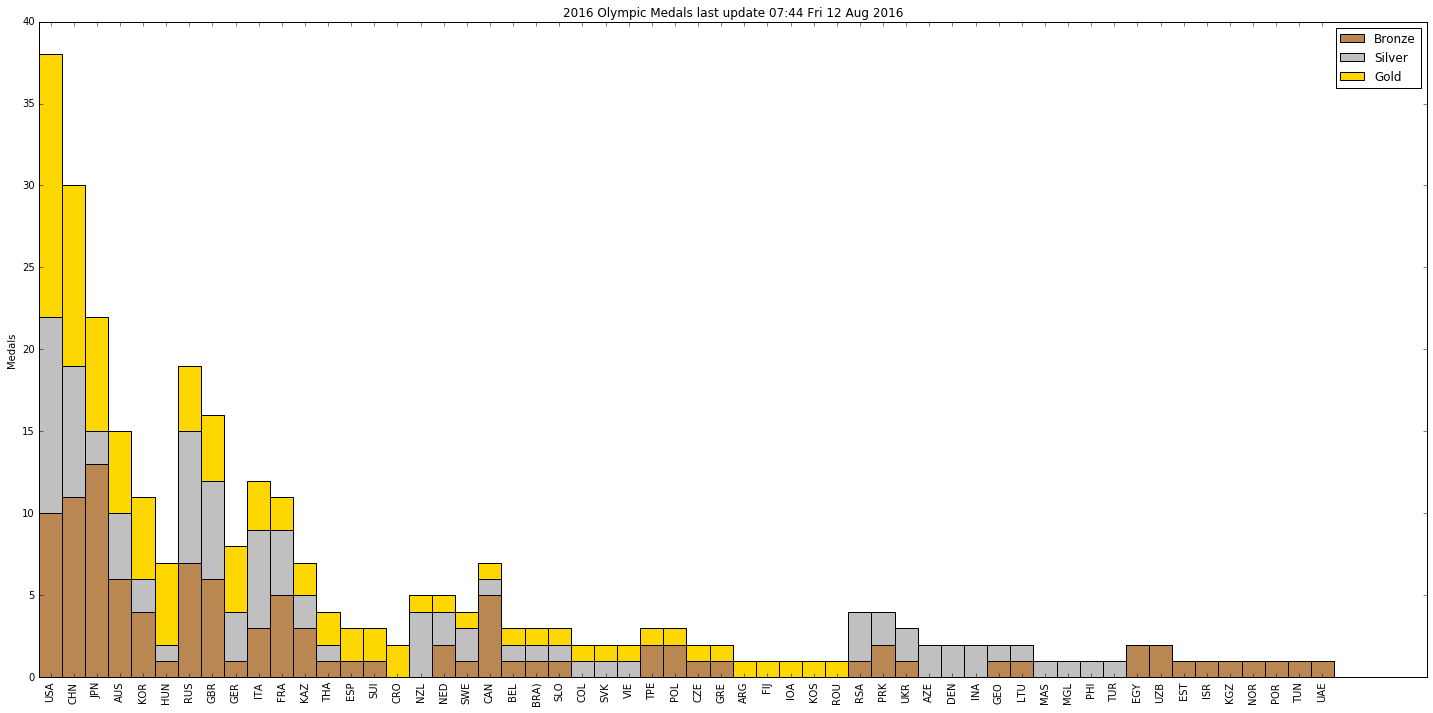

In [6]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
ind = range(len(codes))    # the x locations for the groups
width = 1.0       # the width of the bars: can also be len(x) sequence

bm = plt.bar(ind, bronze, width=width, color='#BA8651')
sm = plt.bar(ind, silver, width=width, color='#C0C0C0', bottom=bronze)
gb = [bronze[i]+silver[i] for i in ind]
gm = plt.bar(ind, gold, width=width, color='#FFD700', bottom=gb)

plt.ylabel('Medals')
plt.title('2016 Olympic Medals last update %s' % last_update)
plt.xticks([i+width/2. for i in ind], codes)
plt.xticks(rotation=90)
plt.legend((bm[0], sm[0], gm[0]), ('Bronze', 'Silver', 'Gold'))
plt.tight_layout(h_pad=2.0)
plt.show()